## Housing Price Prediction in multivariate regression

#### In this project, we will use a multivariate regression model to build a home guide to home buyers on multiple factors associated with house prices to make the buyers more informed when making buying decisions.

In [1]:
# dependencies
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model

Another Tolerant Method for dealing with multicollinearity known as Least Absolute Shrinkage and Selection Operator (LASSO) regression, solves the same constrained optimization problem as ridge regression, but uses the L1 norm rather than the L2 norm as a measure of complexity.

In [2]:
# load the data
house_df = pd.read_csv("raw_data/housing.csv")

# display all the colums
pd.set_option('display.max_columns', None)

# data first look
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# data info
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
print ("Number of rows: " + str(house_df.shape[0]))
print ("Number of columns: " + str(house_df.shape[1]))

Number of rows: 545
Number of columns: 13


In [5]:
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Understand the numerical features

<AxesSubplot:>

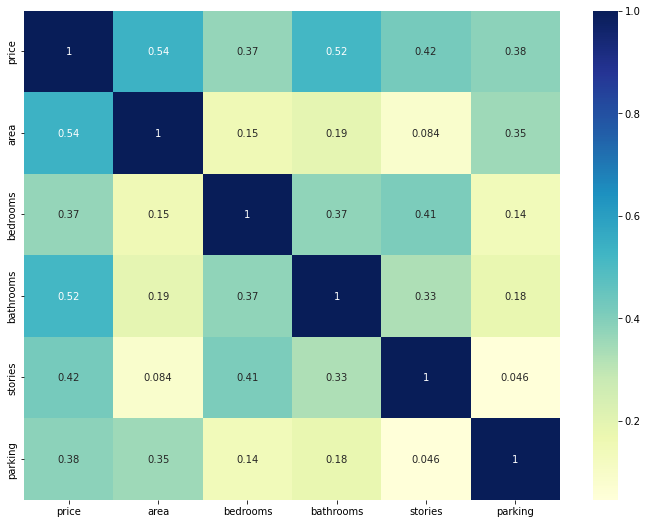

In [6]:
# correlation 
corr = house_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot = True, cmap='YlGnBu')

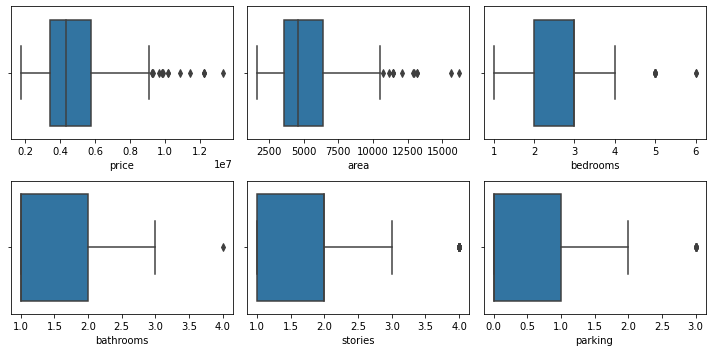

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house_df['price'], ax = axs[0,0])
plt2 = sns.boxplot(house_df['area'], ax = axs[0,1])
plt3 = sns.boxplot(house_df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house_df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house_df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house_df['parking'], ax = axs[1,2])

plt.tight_layout()

### Outlier Treatment
Price and area have considerable outliers, as we have sufficient data, we can drop some.

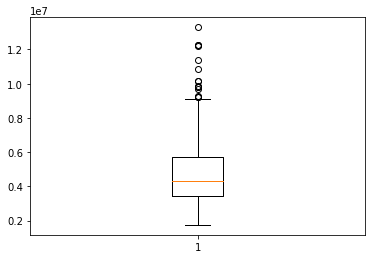

In [8]:
# outlier treatment for price
plt.boxplot(house_df.price)
Q1 = house_df.price.quantile(0.25)
Q3 = house_df.price.quantile(0.75)
IQR = Q3 - Q1
house_df = house_df[(house_df.price >= Q1 - 1.5*IQR) & (house_df.price <= Q3 + 1.5*IQR)]

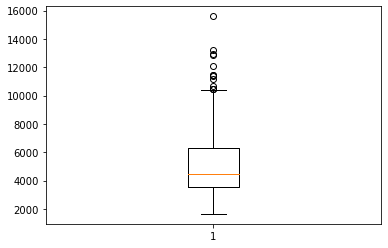

In [9]:
# outlier treatment for area
plt.boxplot(house_df.area)
Q1 = house_df.area.quantile(0.25)
Q3 = house_df.area.quantile(0.75)
IQR = Q3 - Q1
house_df = house_df[(house_df.area >= Q1 - 1.5*IQR) & (house_df.area <= Q3 + 1.5*IQR)]

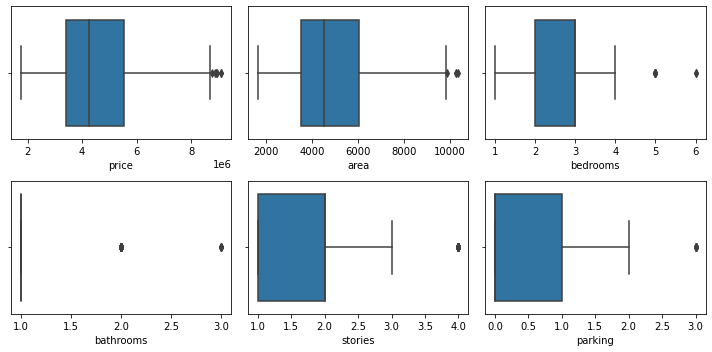

In [10]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house_df['price'], ax = axs[0,0])
plt2 = sns.boxplot(house_df['area'], ax = axs[0,1])
plt3 = sns.boxplot(house_df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house_df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house_df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house_df['parking'], ax = axs[1,2])

plt.tight_layout()

## Visualizing Numeric Variables
Let's make a pairplot of all the numeric variables

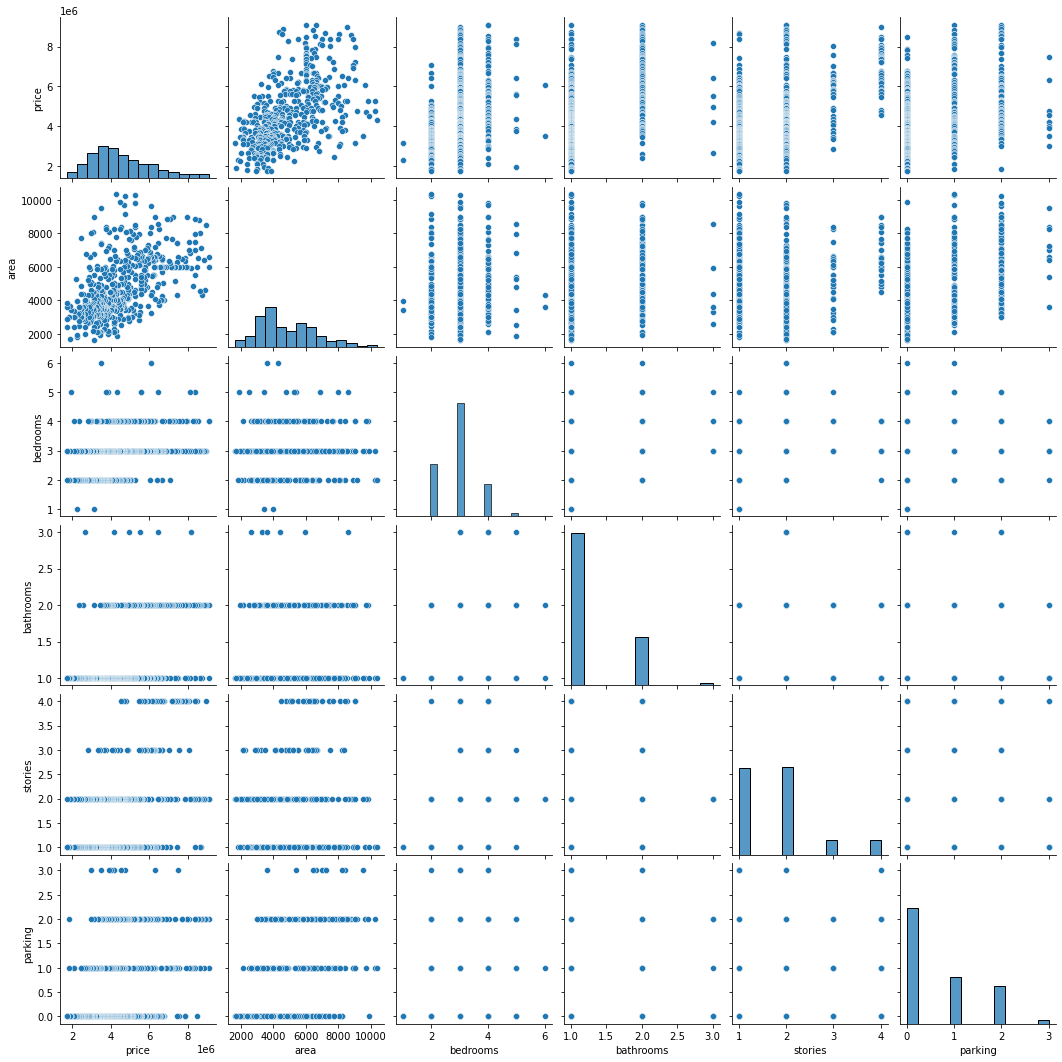

In [11]:
sns.pairplot(house_df)
plt.show()

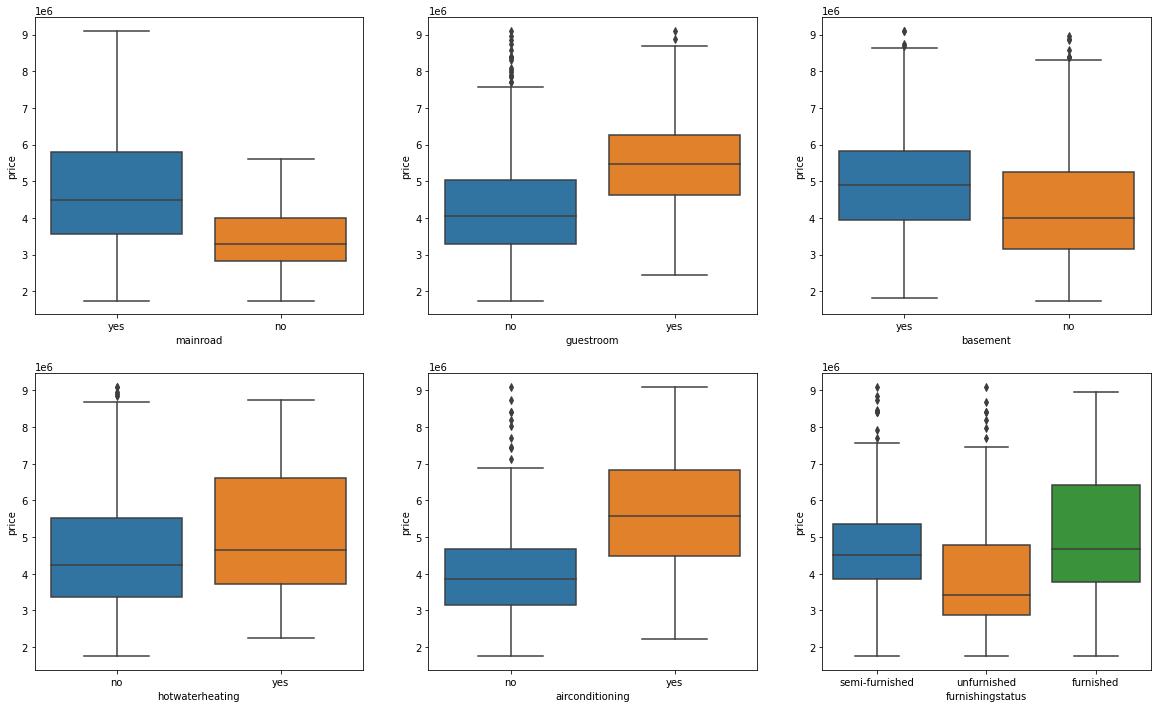

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = house_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = house_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = house_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = house_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = house_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = house_df)
plt.show()

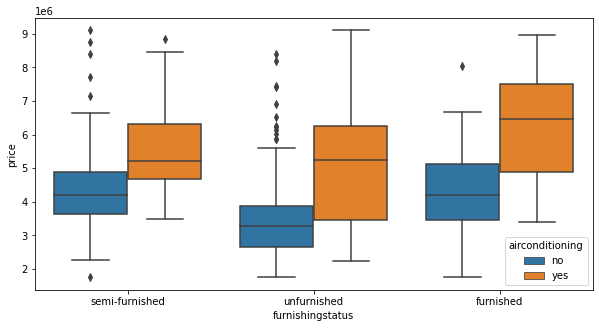

In [13]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = house_df)
plt.show()

## Data Preparation

Convert categorical varables into numerical values, while 1 represents 'Yes', and 0 represents 'No'.

In [14]:
cate_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def mapping(x):
    return x.map({'yes': 1, 'no': 0})
house_df[cate_var] = house_df[cate_var].apply(mapping)

In [15]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


## Dummy Variable
For the furnishingstatus, we decide to drop one columns.

In [16]:
# convert to dummy & drop first one
d_furnishingstatus = pd.get_dummies(house_df['furnishingstatus'], drop_first = True)
d_furnishingstatus.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [17]:
# replace the old furnishingstatus
house_df = pd.concat([house_df, d_furnishingstatus], axis = 1)
house_df.drop(["furnishingstatus"], axis = 1, inplace = True)
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [18]:
# make a copy
new_house = house_df.copy()

## Normalization
The impact of different scaling methods on the model performance is small. \
In the following model training and selection, the MinMax (MM) Scaling data is used.

In [19]:
from sklearn.preprocessing import MinMaxScaler
# standard scaling for numerical variables
scale_1st = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
new_house_mm = new_house.copy()

mm_scale = preprocessing.MinMaxScaler().fit(new_house_mm[scale_1st])
new_house_mm[scale_1st] = mm_scale.transform(new_house_mm[scale_1st])

new_house_mm.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,1.000000,0.499426,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1,0
16,1.000000,0.568312,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,0,1
17,0.980952,0.786452,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
18,0.971429,0.338691,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0,0
19,0.966667,0.547646,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0


## Interaction
In this case, we interact hot water heating and AC

In [20]:
import statsmodels.formula.api as smf
new_house_mm["wh_ac"] = new_house_mm.hotwaterheating * new_house_mm.airconditioning

model_interaction = smf.ols(formula = 'price ~ area + bedrooms + bathrooms + stories + mainroad + guestroom + basement + parking + prefarea + hotwaterheating + airconditioning  + wh_ac', data=new_house_mm).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0182,0.022,0.816,0.415,-0.026,0.062
area,0.2893,0.033,8.848,0.000,0.225,0.354
bedrooms,0.0624,0.045,1.392,0.165,-0.026,0.150
bathrooms,0.2145,0.027,7.882,0.000,0.161,0.268
stories,0.1912,0.024,8.030,0.000,0.144,0.238
mainroad,0.0662,0.017,3.849,0.000,0.032,0.100
guestroom,0.0493,0.017,2.986,0.003,0.017,0.082
basement,0.0490,0.014,3.594,0.000,0.022,0.076
parking,0.0842,0.022,3.836,0.000,0.041,0.127
prefarea,0.0686,0.015,4.662,0.000,0.040,0.098


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(new_house_mm)
new_house_mm.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,wh_ac
15,1.000000,0.499426,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1,0,0
16,1.000000,0.568312,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,0,1,0
17,0.980952,0.786452,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0,0
18,0.971429,0.338691,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0,0,0
19,0.966667,0.547646,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0,0


## Visualizing Interacting Terms
We can see the interaction by cutting one of the terms in the interaction along it's median, and then plotting the response variable against the other variable in the interacting pair.

In [22]:
'''
new_house_mm['ac_med'] = new_house_mm.hotwaterheating > new_house_mm.hotwaterheating.median()
new_house_mm['ac_med'] = np.where(new_house_mm.ac_med == False, "Below Median", "Above Median")
sns.lmplot(x='airconditioning', y='price', hue='ac_med', data=new_house_mm, size=5, aspect=2.5);
'''

'\nnew_house_mm[\'ac_med\'] = new_house_mm.hotwaterheating > new_house_mm.hotwaterheating.median()\nnew_house_mm[\'ac_med\'] = np.where(new_house_mm.ac_med == False, "Below Median", "Above Median")\nsns.lmplot(x=\'airconditioning\', y=\'price\', hue=\'ac_med\', data=new_house_mm, size=5, aspect=2.5);\n'

## Split the data into Training and Testing sets

In [23]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
np.random.seed(0)
df_train, df_test = train_test_split(new_house_mm, train_size = 0.80, test_size = 0.20, random_state = 100)

In [24]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,wh_ac
440,0.201905,0.228473,0.6,0.0,0.333333,1,0,1,0,0,0.000000,0,0,1,0
359,0.266667,0.223881,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1,0
451,0.190476,0.585534,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,1,0,0
415,0.223810,0.359931,0.4,0.0,0.333333,1,1,1,0,1,0.333333,0,0,0,0
177,0.475238,0.505166,0.4,0.0,0.000000,1,0,1,0,0,0.000000,1,1,0,0


In [25]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,wh_ac
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.00000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,0.380071,0.363833,0.387893,0.128329,0.259080,0.871671,0.162228,0.35109,0.046005,0.292978,0.217111,0.200969,0.457627,0.314770,0.002421
std,0.213500,0.199643,0.149915,0.229492,0.280384,0.334862,0.369107,0.47789,0.209750,0.455681,0.281482,0.401211,0.498806,0.464987,0.049207
min,0.000000,0.005741,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.227619,0.212400,0.200000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.310218,0.400000,0.000000,0.333333,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.499426,0.400000,0.000000,0.333333,1.000000,0.000000,1.00000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

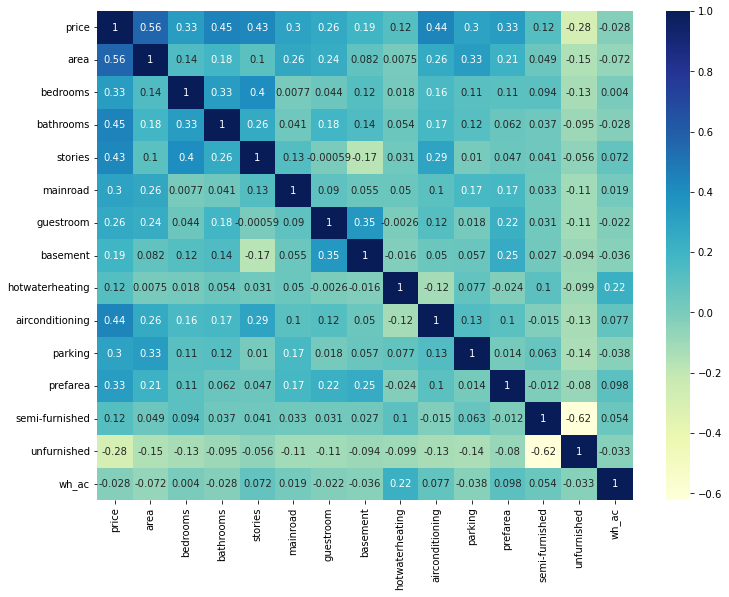

In [26]:
corr_sc = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_sc, annot = True, cmap='YlGnBu')

In [27]:
# divide into x and y set
y_train = df_train.pop("price")
x_train = df_train
y_test = df_test.pop("price")
x_test = df_test

In [28]:
y_train

440    0.201905
359    0.266667
451    0.190476
415    0.223810
177    0.475238
         ...   
255    0.371429
307    0.328571
72     0.676190
377    0.257143
99     0.614286
Name: price, Length: 413, dtype: float64

## Modeling without RFE Selection

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# drop some features
d_x_train = x_train.drop(["bedrooms", "guestroom", "semi-furnished"], axis=1)

In [31]:
lm_wo_selection=LinearRegression()

In [32]:
lm_wo_selection.fit(d_x_train,y_train)

LinearRegression()

In [33]:
lm_wo_selection.coef_

array([ 0.34226264,  0.20927522,  0.20716622,  0.05218914,  0.04653187,
        0.12204172,  0.09455917,  0.06785722,  0.09249295, -0.05443463,
       -0.33129591])

In [34]:
lm_wo_selection.score(d_x_train,y_train)

0.6649134529906224

In [35]:
lm_wo_selection.intercept_

0.06448537028606366

In [36]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train = sm.add_constant(d_x_train)

In [37]:
# Running the linear model
lm_wo_selection = sm.OLS(y_train,x_train).fit()

In [38]:
print(lm_wo_selection.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     72.34
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           4.66e-88
Time:                        14:01:55   Log-Likelihood:                 277.98
No. Observations:                 413   AIC:                            -532.0
Df Residuals:                     401   BIC:                            -483.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0645      0.021     

## Modeling with RFE Selection

In [39]:
# Recursive Feature Elimination (RFE) for Feature Selection
from sklearn.feature_selection import RFE

In [40]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [41]:
lm.intercept_

0.06448537028606321

In [42]:
rfe = RFE(lm, 6)
rfe = rfe.fit(x_train, y_train)

In [43]:
list(zip(x_train.columns, rfe.support_,rfe.ranking_))

[('const', False, 7),
 ('area', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('basement', False, 6),
 ('hotwaterheating', True, 1),
 ('airconditioning', False, 2),
 ('parking', False, 3),
 ('prefarea', True, 1),
 ('unfurnished', False, 4),
 ('wh_ac', True, 1)]

In [44]:
col = x_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'prefarea', 'wh_ac'], dtype='object')

In [45]:
x_train.columns[~rfe.support_]

Index(['const', 'mainroad', 'basement', 'airconditioning', 'parking',
       'unfurnished'],
      dtype='object')

In [46]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [48]:
# Running the linear model
lm = sm.OLS(y_train,x_train_rfe).fit()

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     93.07
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           3.75e-73
Time:                        14:01:55   Log-Likelihood:                 230.86
No. Observations:                 413   AIC:                            -447.7
Df Residuals:                     406   BIC:                            -419.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0926      0.015     

##### The p-value of wh_ac is smaller then 0.05, which turns out it is NOT statistically significant and indicates strong evidence for the null hypothesis. (This means we retain the null hypothesis and reject the alternative hypothesis.)

#### The resulting model is written as:
$ price = 0.46*area + 0.25*bathrooms + 0.23*stories + 0.11*hotwaterheating + 0.11*prefarea $

In [50]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.93
2,bathrooms,1.10
1,area,1.09
3,stories,1.08
6,wh_ac,1.08
5,prefarea,1.07
4,hotwaterheating,1.06


With this plot shows us, is that when the Air Condition (AC) values is small (i.e. below the median value), the relationship between price and hotwater heater is positive. Conversely, at higher AC values, there is a much stronger relationship between how water heater and price. 

## Residual Analysis of the train data

In [52]:
y_train_price = lm.predict(x_train_rfe)

In [53]:
res = (y_train_price - y_train)

In [54]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

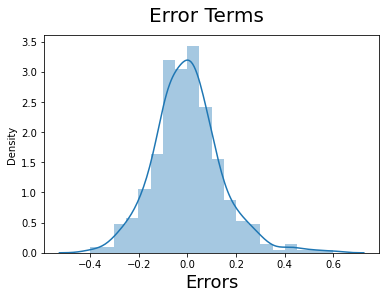

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

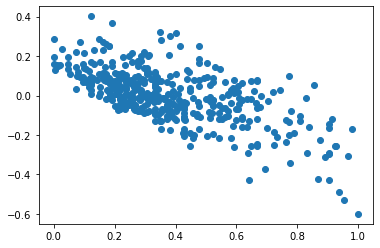

In [56]:
plt.scatter(y_train,res)
plt.show()

## Model Evaluation

In [57]:
# Adding constant variable to test dataframe
x_test = sm.add_constant(x_test)

In [58]:
x_test_rfe = x_test[x_train_rfe.columns]

In [59]:
# predictions
y_pred = lm.predict(x_test_rfe)

In [60]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.44132696417427597

Text(0, 0.5, 'y_pred')

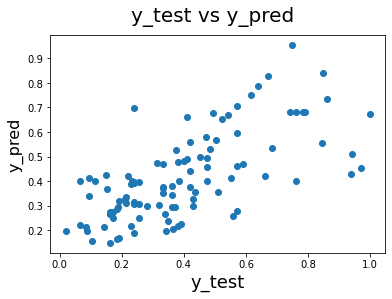

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)